In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
import scipy.stats as t
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

# Задание 0

По условию уровень доверия равен 0,95 (95%), значит α = 0,05. 
1 - α/2 = 0,975 (по таблице нормального распределения).
Квантиль Zα = 1,96

Найдем объем выборки

In [14]:
n = ((1.06 * (np.sqrt(225))/3)**2)
print(f'минимальный объем выборки:{round(n)}')

минимальный объем выборки:28


# Задание 1

In [34]:
a = 1-0.98 #  α 
n = 25 # объем выборки
b = 1-a/2 # по таблице нормального распределения
z = 2.576 # квантиль по нормальному распределению
mean = 130
sigma = 15

delta = (sigma/(n**(0.5)))*z # точность
X1 = n-delta
X2 = n+delta

L = int(X2 - X1)
L

15

# Задание 2

In [54]:
import scipy.stats as stats
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170

In [63]:
a = 0.001
t, p_value = stats.ttest_ind(mens, womens) # критерий Стьюдента (t-test)
if a < p_value:
    print('гипотеза не подтверждена, p-value равно:', round(p_value, 5))
else:
    print('гипотеза подтверждена, p-value равно:', round(p_value, 5))

гипотеза подтверждена, p-value равно: 0.00025


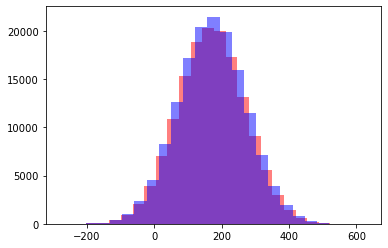

In [64]:
plt.hist(womens, color='r', alpha=0.5, bins=25); # выборка по женщинам
plt.hist(mens, color='b',  alpha=0.5, bins=25);  # выборка по мужчинам

# Задание 3

In [65]:
sigma = 150  # стандартное отклонение
delta = 50 # желаемая точность
a = 1-0.95 #  α 
b = 1-a/2 # по таблице нормального распределения
z = 2.241 # квантиль

n = int(((sigma*z)/delta)**2)
n

45

# Задание 4

In [66]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [67]:
oddsratio, pvalue = stats.fisher_exact(observations) # Возможно пригодится эта функция
oddsratio, pvalue

(0.5811965811965812, 0.35417955365927367)

In [74]:
a = 0.05
if pvalue > a:
    print('p-value (', round(pvalue, 2),') больше, чем уровень значимости (', a, ') - эффект случайный: маг врёт');
elif pvalue == a:
    print('p-value (', round(pvalue, 2),') равен уровню значимости (', a, ') - эффект неоднозначный: надо наблюдать');
else:
    print('p-value (', round(pvalue, 2),') меньше уровня значимости (', a, ') - эффект неслучайный: маг реальный маг))))')

p-value ( 0.35 ) больше, чем уровень значимости ( 0.05 ) - эффект случайный: маг врёт


# Задание 5

In [77]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [84]:
def mean_confidence_interval(data, confidence=0.95): 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

mean_confidence_interval(data, 0.90)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

# Задание 6

In [85]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]

In [92]:
t , p  = stats.ttest_ind(A, B)
print("t = " + str(t))
print("p = " + str(p))

t = 11.865233896372924
p = 4.623319592204015e-25


Чем больше значение t-score, тем больше группы отличаются. Значение p-value , меньше 0,05, и, таким образом, мы отклоняем нулевую гипотезу и, таким образом, это доказывает, что средние значения двух распределений различны и различие статистически значимо, а значит выборки принадлежат к разным множествам.

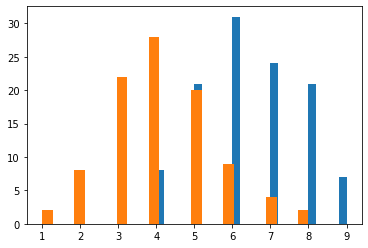

In [94]:
plt.hist(A, bins=25);
plt.hist(B, bins=25);

# Задание 7

Результат зависит от уровня значимости - α, чем более низкий порог мы выберем тем более очевидна разница в интерпретации:
1. Если α = 0.05, то мы примнимаем нашу альтернативную гипотезу т.к. p-value меньше α
2. Если α = 0.01, то мы отвергаем нашу альтернативную гипотезу т.к. p-value больше α

# Задание 8

Так как это две разные выборки, используем двухвыборочный t-test

In [100]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-7.5,size=300)

stats.ttest_ind(A, B)

Ttest_indResult(statistic=1.8847229265385363, pvalue=0.05995194857529052)

P-value больше уровня значимости - различия статистически не значимы.
Различия будут значимы при p-value 0,06.

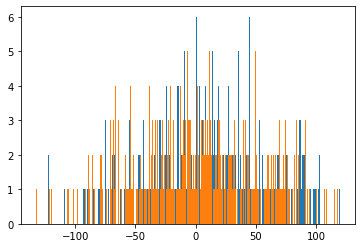

In [101]:
plt.hist(A, bins=300);
plt.hist(B, bins=300);